In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


    awscli (>=1.16.100boto3>=1.9.100)
           ~~~~~~~~~~~~^


In [8]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("TB_burden_countries_2014-09-29.csv")
df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN


In [13]:
df.describe()

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
count,4903.000000,4903.000000,4.903000e+03,4892.000000,4892.000000,4892.000000,4.892000e+03,4.892000e+03,4.892000e+03,4902.000000,...,3457.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,4476.000000,4476.000000,4476.000000
mean,433.487457,2001.042219,2.899179e+07,207.694422,93.683299,378.137001,6.914368e+04,4.366106e+04,1.064607e+05,16.245420,...,11.544342,38.941043,31.168524,48.023050,5909.707473,4611.192352,7552.394668,67.570706,57.608038,83.015950
std,255.202944,6.643548,1.177827e+08,269.720954,138.015090,501.059424,3.304527e+05,2.729764e+05,4.152786e+05,23.916259,...,17.518341,119.302756,96.875516,145.889395,23180.013244,18886.813523,28972.612879,26.411285,23.592254,45.020396
min,4.000000,1990.000000,1.129000e+03,0.260000,0.080000,0.540000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,1995.000000,5.508830e+05,25.000000,10.000000,46.000000,4.000000e+02,1.600000e+02,7.800000e+02,1.400000,...,0.590000,0.190000,0.140000,0.230000,17.000000,13.000000,21.000000,50.000000,41.000000,64.000000
50%,430.000000,2001.000000,5.140332e+06,93.000000,37.000000,164.000000,4.600000e+03,1.900000e+03,8.200000e+03,5.400000,...,3.600000,2.000000,1.600000,2.500000,160.000000,120.000000,200.000000,74.000000,62.000000,92.000000
75%,646.000000,2007.000000,1.732282e+07,306.000000,129.250000,526.500000,3.000000e+04,1.300000e+04,5.300000e+04,22.000000,...,14.000000,15.000000,11.000000,18.000000,1500.000000,1300.000000,1800.000000,87.000000,77.000000,99.000000
max,894.000000,2012.000000,1.377065e+09,1860.000000,1316.000000,3565.000000,4.600000e+06,4.000000e+06,5.200000e+06,221.000000,...,88.000000,1151.000000,911.000000,1418.000000,330000.000000,270000.000000,390000.000000,340.000000,240.000000,1600.000000


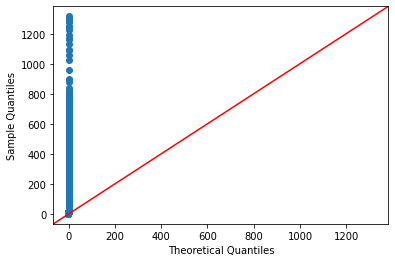

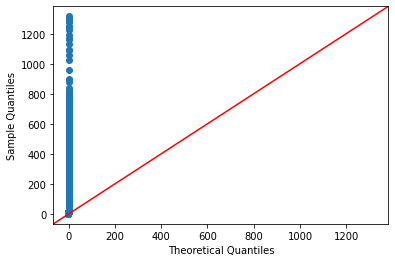

In [14]:
sm.qqplot(df.e_prev_100k_lo,line="45")